# NumPyとグラフ

データサイエンスの基礎となるNumPyとMatplotlibの使い方を練習しましょう。



## 準備

Pythonで拡張機能を用いたプログラミングをするときは、まずモジュールをインポートして使います。


### Numpyとは

Numpyは、科学計算やデータサイエンス、機械学習で最もよく使われる基本的なライブラリです。
多次元配列を効率よく処理することができます。

Numpy モジュールを`np`という名前でインポートします。

In [1]:
import numpy as np
import numpy.random as random
%precision 3

'%.3f'

### Matplotlib

Matplotlib は、NumPy配列などを描画する定番のライブラリです。

論文出版に耐えうる高品質なグラフが作画できます。



In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

Colab上で、グラフを日本語表示したいときは、日本語化されたmatplotlibをインストールして用います。

```
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化 matplotlib 
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
%matplotlib inline
```

## NumPy配列操作

NumPy配列は、数列のリストの高効率＆高速版です。


In [3]:
data = [1, 2, 3, 4, 5, 6] # Pythonのリスト(遅い)
data

[1, 2, 3, 4, 5, 6]

In [4]:
data = np.array(data) # NumPyの配列（高速)
data

array([1, 2, 3, 4, 5, 6])

<div class="alert alert-info">

NumPyはなぜ速い？

NumPyで扱うデータは、高速に計算するため、C/C++言語のデータ型で値を持っています。
データ型は、`.dtype`で確認できます。

```
data.dtype
```

</div>

### 配列の基本操作

配列は、数列なので、リストと同じく、`data[0]`や、`data[1:3]`のように列（シーケンス）として操作できます。


<div class="admonition tip">

**例題（配列）**

次の配列`a`に対し、次の値を求める操作を書いてみよう

入力例：
```
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
```

1. `a`の要素数を得る
2. `a`の先頭と末尾の和
3. `a`の先頭を取り除いた配列
4. `a`を逆順にした配列
5. `a`の総和
6. `a`の平均値

</div>




In [5]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
len(a)

9

In [6]:
a[0]+a[-1]

8

In [7]:
a[1:]

array([1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
a[::-1]

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

In [9]:
a.sum()

36

In [10]:
a.mean()

4.0

### 配列の演算

Numpyの要素は数値になっているので、演算は基本的にベクトル演算と解釈されます。

__各要素を2倍する__

In [11]:
a * 2


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

__和、差__

In [12]:
b = a*2
a - b


array([ 0, -1, -2, -3, -4, -5, -6, -7, -8])

__内積__

In [13]:
a * b

array([  0,   2,   8,  18,  32,  50,  72,  98, 128])

### ユニバーサル関数

NumPyの配列上で、要素ごとに演算を行い、同一サイズの配列を返す関数を[ユニバーサル関数](https://docs.pyq.jp/python/pydata/numpy/universal_function.html)といいます。

__例: sin(x)のユニバーサル関数__




In [14]:
a = np.array([0.0, 0.1, 0.2])
np.sin(a)


array([0.   , 0.1  , 0.199])

<div class="alert alert-info">

ユニバーサル関数と高階関数map

ユニバーサル関数は、要するに高階関数のmapやリスト内包記法を組み合わせるのと同じですが、こちらの方がより高速に処理できます。

__map関数__
```
np.array(map(sin, a))  #　np.sin(a)と同じ
```

__リスト内包記法__
```
np.array([sin(x) for x in a])　#　np.sin(a)と同じ
```

</div>


### フィルタ

NumPyのフィルタ、つまり条件にマッチした数列だけ残す操作は、少し特殊ですが`配列[条件式]`と書きます。

つまり、配列の条件式は、論理値の配列になります。


In [15]:
a = np.array([1,2,3,4,5,6,7,8,9])
a % 2 == 0  ## 偶数かどうか

array([False,  True, False,  True, False,  True, False,  True, False])

この条件式の配列をインデックスに入れると、True に相当する値だけ抽出されます。

In [16]:
a[a % 2 == 0]

array([2, 4, 6, 8])

### 次元の変更

`reshape`を用いれば、次元を変更し、ベクトルと行列（２次元配列）を変換できます。


In [17]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
a.reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

<div class="alert alert-info">

行列の計算

Numpyの真価が発機されるのは、行列演算に応用したときです。
本講義では、行列演算は深入りしませんが、
興味があったら行列計算についても調べてみよう。

</div>

### 数列の生成

最後に、データサイエンスで用いる便利な数列の生成を紹介しておきます。

__等差数列__ (つまり、`range(x)`のNumPy版)

In [18]:
np.arange(10)  # 0から10未満までの整数列

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
np.arange(1, 101, 5)  # 1から100までの5刻みの整数列

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

__区間を指定した数列__

こちらは、要素の数をズバリ指定します。

In [20]:
np.linspace(-10, 10, 20)  # 区間[-10, 10] 要素数20の数列

array([-10.   ,  -8.947,  -7.895,  -6.842,  -5.789,  -4.737,  -3.684,
        -2.632,  -1.579,  -0.526,   0.526,   1.579,   2.632,   3.684,
         4.737,   5.789,   6.842,   7.895,   8.947,  10.   ])

__同じ値の数列__

20個の0からなる数列

In [21]:
np.zeros(20)  # 0が20個

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [22]:
np.ones(15)  # 1が15個

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

__乱数列__


In [23]:
np.random.rand(100)   # 0.0から1.0までの乱数列(100個)

array([7.333e-01, 6.045e-01, 6.082e-01, 2.238e-01, 9.157e-01, 1.126e-01,
       5.034e-01, 1.964e-01, 7.921e-01, 1.218e-01, 1.157e-01, 4.501e-01,
       2.001e-01, 4.050e-01, 5.095e-01, 3.035e-01, 6.469e-01, 2.028e-01,
       2.977e-01, 8.622e-01, 5.230e-01, 4.417e-01, 3.243e-01, 5.903e-01,
       9.903e-01, 4.722e-01, 1.296e-01, 2.727e-01, 6.982e-01, 7.432e-01,
       6.882e-01, 5.428e-01, 9.710e-01, 2.165e-01, 7.370e-01, 4.428e-01,
       6.912e-01, 2.280e-01, 4.663e-01, 3.122e-01, 5.204e-01, 2.245e-02,
       1.549e-01, 3.216e-01, 2.459e-01, 1.061e-02, 3.902e-01, 2.434e-01,
       6.290e-01, 1.347e-01, 2.173e-01, 7.907e-01, 8.940e-01, 8.465e-01,
       2.336e-01, 8.025e-01, 9.669e-02, 9.196e-01, 7.397e-01, 1.024e-01,
       5.850e-02, 7.801e-01, 2.505e-01, 4.644e-01, 8.328e-01, 3.799e-01,
       8.965e-02, 5.107e-01, 3.406e-01, 8.414e-02, 5.300e-01, 8.563e-01,
       2.744e-01, 5.512e-01, 5.722e-02, 1.910e-01, 1.913e-01, 7.584e-01,
       5.067e-01, 2.708e-01, 4.618e-01, 6.704e-01, 

In [24]:
np.random.randint(1, 6, 100) #1から6までの乱数列(100個)

array([4, 2, 2, 4, 1, 2, 3, 1, 2, 2, 1, 5, 1, 5, 4, 2, 2, 2, 4, 3, 5, 4,
       4, 1, 3, 4, 4, 5, 2, 3, 2, 3, 2, 1, 1, 3, 1, 5, 2, 1, 4, 4, 2, 2,
       4, 4, 4, 2, 3, 2, 5, 5, 2, 5, 3, 5, 2, 3, 2, 3, 4, 1, 3, 4, 3, 4,
       4, 2, 5, 1, 4, 5, 3, 5, 2, 1, 1, 4, 3, 4, 2, 5, 5, 4, 5, 4, 3, 2,
       3, 2, 3, 2, 2, 5, 5, 5, 1, 1, 5, 5])

## グラフの描画

数列は、グラフ化すると、視覚的にみやすく、特徴が理解しやすくなります。

例えば、x, yの数列を表示してみても、xとyの関係性はわかりません。


In [25]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
print(x)
print(y)

[-10.     -9.798  -9.596  -9.394  -9.192  -8.99   -8.788  -8.586  -8.384
  -8.182  -7.98   -7.778  -7.576  -7.374  -7.172  -6.97   -6.768  -6.566
  -6.364  -6.162  -5.96   -5.758  -5.556  -5.354  -5.152  -4.949  -4.747
  -4.545  -4.343  -4.141  -3.939  -3.737  -3.535  -3.333  -3.131  -2.929
  -2.727  -2.525  -2.323  -2.121  -1.919  -1.717  -1.515  -1.313  -1.111
  -0.909  -0.707  -0.505  -0.303  -0.101   0.101   0.303   0.505   0.707
   0.909   1.111   1.313   1.515   1.717   1.919   2.121   2.323   2.525
   2.727   2.929   3.131   3.333   3.535   3.737   3.939   4.141   4.343
   4.545   4.747   4.949   5.152   5.354   5.556   5.758   5.96    6.162
   6.364   6.566   6.768   6.97    7.172   7.374   7.576   7.778   7.98
   8.182   8.384   8.586   8.788   8.99    9.192   9.394   9.596   9.798
  10.   ]
[ 0.544  0.365  0.17  -0.031 -0.231 -0.421 -0.595 -0.744 -0.863 -0.947
 -0.992 -0.997 -0.962 -0.887 -0.776 -0.634 -0.466 -0.279 -0.08   0.121
  0.318  0.502  0.665  0.801  0.905  0.972  0.

Matplotlib でグラフに表示してみると、わかります。

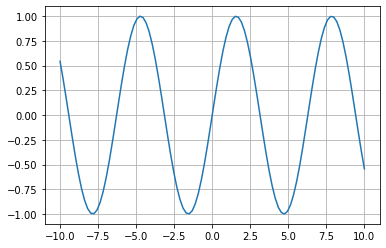

In [26]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.grid(True)

$y = sin(x)$の例から、グラフの書き方を学びましょう

1. x 軸の数列を作成する
2. y 軸の数列を計算する
3. グラフの大きさ、ラベルなどを設定
4. `plt.plot(x, y)` でグラフにプロット

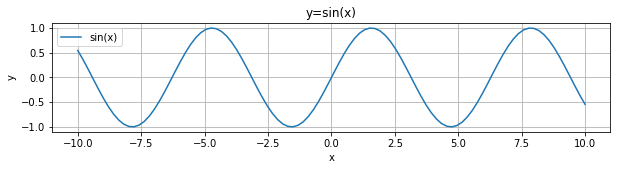

In [27]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 2)) #グラフの大きさを指定
plt.plot(x, y, label='sin(x)')
plt.legend() #ラベルの表示

plt.title('y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True) #グリッド

<div class="alert alert-info">

Let's try

1. $y=cos(x)$のグラフに書き換えてみよう
2. $y=sin(x)$と$y=cos(x)$を同じグラフに書いてみよう
3. $y=sin(x), y=sin(2x), y=sin(3x), ..$ と同じグラフに書いてみよう

</div>

### 関数グラフの描画

自分で定義した関数もグラフで描画することができます。

$f(x) = x^2 - 2x + 1$

In [28]:
def f(x):
    return x ** 2 - 2*x + 1

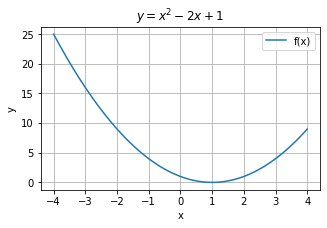

In [29]:
x = np.linspace(-4, 4, 100) # 区間[-4, 4]にする
y = f(x)

plt.figure(figsize=(5, 3)) #グラフの大きさを指定
plt.plot(x, y, label='f(x)')
plt.legend() #ラベルの表示

plt.title('$y=x^2-2x+1$') # latex の数式
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

### 円の描画 (媒介変数)

円は、$x^2 + y^2 = 1$ ですね。つまり.. 

1. $x = cos(t)$
2. $y = sin(t)$


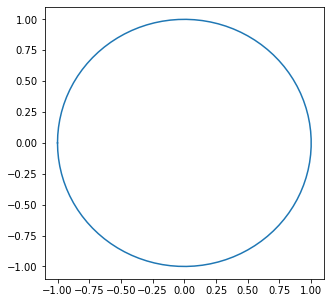

In [30]:
t = np.linspace(-np.pi, np.pi, 100)
x = np.cos(t)
y = np.sin(t)
plt.figure(figsize=(5,5))
plt.plot(x, y)

(-1.000, 1.000)

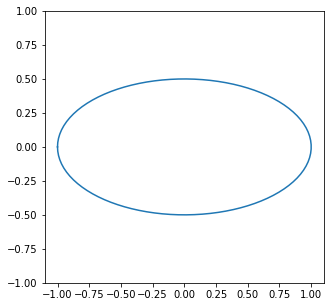

In [31]:
t = np.linspace(-np.pi, np.pi, 100)
x = np.cos(t)
y = np.sin(t)
plt.figure(figsize=(5,5))
plt.plot(x, 0.5 * y)
plt.ylim(-1.0, 1.0)

<div class="alert alert-info">

Let's try

[リサジュー図形](https://ja.wikipedia.org/wiki/リサジュー図形)を描画してみよう。
</div>

## 色々なグラフ
Matplotlibは色々なグラフを描画することができます。
少し例をみながら書き方を学びましょう。_

### 散布図 (`plt.scatter(x,y)`)

散布図は、2つのデータの組み合わせに対して、xy座標上にプロットしたグラフです。
散布図を書くと、ふたつのデータの関連性が見えてきます。

__一様乱数列 X, Yの散布図__

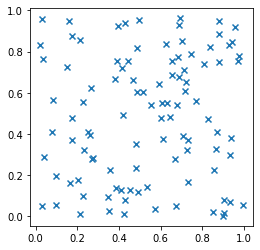

In [32]:
x = np.random.rand(100)
y = np.random.rand(100)
plt.figure(figsize=(4,4))
plt.scatter(x, y, marker='x')

__色分けして表示する例__

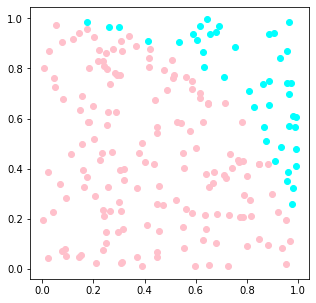

In [33]:
# モンテカルロ法
x = np.random.rand(200)
y = np.random.rand(200)
d = np.hypot(x, y)
# print(d <1.0)
x_inside = x[d<1.0]
y_inside = y[d<1.0]
x_outside = x[d>=1.0]
y_outside = y[d>=1.0]

plt.figure(figsize=(5,5))
plt.scatter(x_inside,y_inside, c='pink')
plt.scatter(x_outside,y_outside, c='cyan')



### 棒グラフ `plt.bar()`

棒グラフは、カテゴリーごとの数値を比較したい時に使います。

([<matplotlib.axis.XTick at 0x13c4d4fd0>,
 [Text(1, 0, 'A'), Text(2, 0, 'B'), Text(3, 0, 'C')])

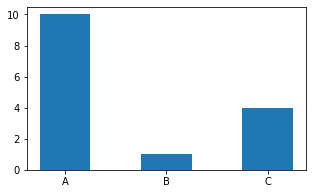

In [34]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize=(5,3))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, ['A', 'B', 'C'])


### ヒストグラム

ヒストグラムは、縦軸に度数、横軸に階級をとり、データの分布状況を視覚的に認識するために定番のグラフです。

__サイコロを60回ふったときの各目の出現__

[2 5 4 4 3 6 6 2 1 4 5 4 1 1 6 5 1 1 2 6 1 6 6 4 5 1 4 4 4 6 4 1 4 6 1 2 5
 4 1 1 1 6 5 5 6 2 3 4 3 1 1 4 2 6 4 3 5 6 5 6]


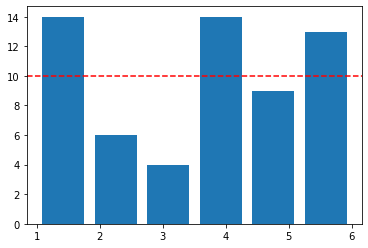

In [35]:
x = np.random.randint(1, 7, 60)
print(x)
plt.hist(x, bins=6, rwidth=0.8) 
plt.axhline(y = 10, color='red', linestyle='--') #期待値に赤点戦を引く

<div class="alert alert-info">

Let's try: [大数の法則](https://ja.wikipedia.org/wiki/大数の法則)

サイコロをふる回数を増やしてみて、偏りが平坦になることを確認してみよう
</div>

### Subplot 複数の図を表示する

Subplotの機能を使えば、
複数の図をみやすいように一枚にまとめて描画することができます。

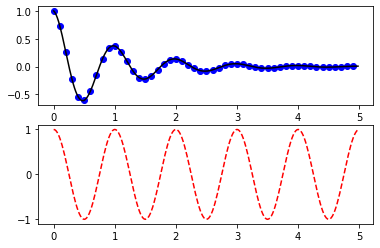

In [36]:
# https://matplotlib.org/tutorials/introductory/pyplot.html より
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### もっと Matplotlibを使いこなすには？

Matplotlibは、科学論文誌において定番的に用いられるグラフ作成術です。
機能は豊富で短期間にマスターし尽くせるものでもありません。

今後、Matplotlib を使ってグラフを描画するサンプルをみることが増えますが、
気になるところがあったら、Webで調べながら技を増やしていきましょう。

ぜひ、Webの情報を活用して使いこなしていきましょう。

https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

## 演習問題

<div class="admonition tip">

**演習問題（３個のサイコロ）**

3個のサイコロを1000回ふることを考える。
このとき、$3$個のサイコロの目の和の頻度分布をヒストグラムとして描画せよ。
また、サイコロの数を増やしていくと、どのような分布に近づくか考察せよ。
</div>
